In [23]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers

In [36]:
BATCH_SIZE = 256
EPOCHS = 20
LEARNING_RATE = 0.001

In [25]:
tornado_df = pd.read_csv("./1950-2018_torn_preprocessed.csv",)

In [26]:
tornado_df.head()

,Unnamed: 0,tz,stf,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,day_rad,time_rad
0,0,3,29,3,3,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0.051643,2.879793
1,1,3,29,3,3,0,6.0,0.0,38.77,-90.22,38.82,-90.12,6.2,150,0.051643,2.879793
2,2,3,17,3,0,0,5.0,0.0,38.82,-90.12,38.83,-90.03,3.3,100,0.051643,2.923426
3,3,3,17,3,3,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0.051643,3.119776
4,4,3,39,1,1,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0.051643,4.188790


In [27]:
tornado_df.dtypes

Unnamed: 0      int64
tz              int64
stf             int64
mag             int64
inj             int64
fat             int64
loss          float64
closs         float64
slat          float64
slon          float64
elat          float64
elon          float64
len           float64
wid             int64
day_rad       float64
time_rad      float64
dtype: object

In [28]:
NUM_VALIDATION = 0.20
tornado_train_df, tornado_validation_df = train_test_split(tornado_df, test_size=NUM_VALIDATION, random_state=1)

In [29]:
NUM_TEST = 0.10
tornado_train_df, tornado_test_df = train_test_split(tornado_train_df, test_size=NUM_TEST, random_state=1)

In [30]:
print(len(tornado_test_df)/len(tornado_df))
print(len(tornado_train_df)/len(tornado_df))
print(len(tornado_validation_df)/len(tornado_df))

0.0800135982940322
0.7199833111845968
0.20000309052137097


In [31]:
tornado_train_labels = tornado_train_df['elat'].values
tornado_validation_labels = tornado_validation_df['elat'].values
tornado_train_df = tornado_train_df.drop(['elat'], axis=1)
tornado_validation_df = tornado_validation_df.drop(['elat'], axis=1)

In [39]:
# scaler = preprocessing.MinMaxScaler()
# train_scaled = scaler.fit_transform(tornado_train_df)
# validation_scaled = scaler.transform(tornado_validation_df)
# test_scaled = scaler.transform(tornado_test_df)

ValueError: operands could not be broadcast together with shapes (5178,16) (15,) (5178,16) 

In [33]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=tornado_train_df.shape[1], activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

adam = optimizers.adam(lr=LEARNING_RATE)
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [37]:
history = model.fit(x=tornado_train_df, y=tornado_train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    verbose=1, validation_data=(tornado_validation_df, tornado_validation_labels), 
                    shuffle=True)

Train on 46593 samples, validate on 12943 samples
Epoch 1/20
46593/46593 [==============================] - 11s 232us/step - loss: 416.5887 - mean_absolute_error: 16.9687 - val_loss: 1935.7549 - val_mean_absolute_error: 19.6859
Epoch 2/20
46593/46593 [==============================] - 5s 101us/step - loss: 324.2241 - mean_absolute_error: 16.4217 - val_loss: 2084.3899 - val_mean_absolute_error: 19.5702
Epoch 3/20
46593/46593 [==============================] - 5s 111us/step - loss: 343.0992 - mean_absolute_error: 17.5719 - val_loss: 1635.8027 - val_mean_absolute_error: 18.7703
Epoch 4/20
46593/46593 [==============================] - 5s 102us/step - loss: 296.8740 - mean_absolute_error: 14.0620 - val_loss: 584.7870 - val_mean_absolute_error: 13.5591
Epoch 5/20
46593/46593 [==============================] - 3s 71us/step - loss: 316.7805 - mean_absolute_error: 15.2721 - val_loss: 483.3079 - val_mean_absolute_error: 18.7214
Epoch 6/20
46593/46593 [==============================] - 3s 62us/s

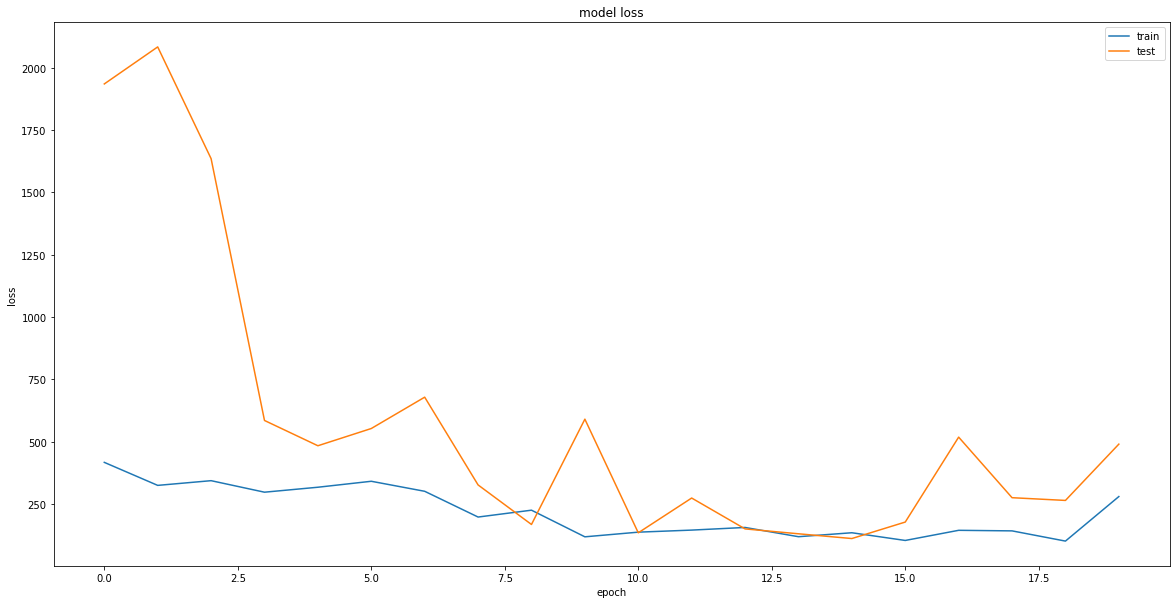

In [38]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()